In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy  as np
import matplotlib.pyplot as plt
import skimage.io

from saliency import saliency

# Visual Saliency

This is a re-implementation of the functions provided in the template code for Visual Saliency.
In this notebook, I demontrate the necessary steps to process an image with the Itty Koch model

| Input Image | Ground Truth |
|-|-|
|![data/imgs/67.jpg](data/imgs/67.jpg)|![data/imgs/d67.jpg](data/imgs/d67.jpg)|

load images

In [4]:
gt  = skimage.io.imread('data/imgs/d67.jpg')
img = skimage.io.imread('data/imgs/67.jpg') / 255.

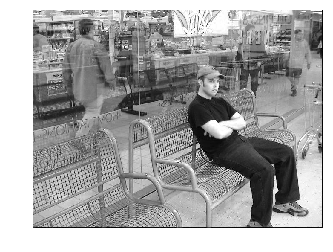

In [9]:
import skimage.color

refcolor = np.array([1.,0.,0.])

img_hsv  = skimage.color.rgb2hsv(img)
refcolor = skimage.color.rgb2hsv(refcolor.reshape(1,1,3)) # to make it compatible

plt.imshow(img_hsv[...,2], cmap="gray")
plt.axis("off")
plt.show()

#### Running the Itty Koch model

We now run the Itty Koch model on the image. Apart from the salicency map, we receive the individual channel maps to be able to debug the model

processing


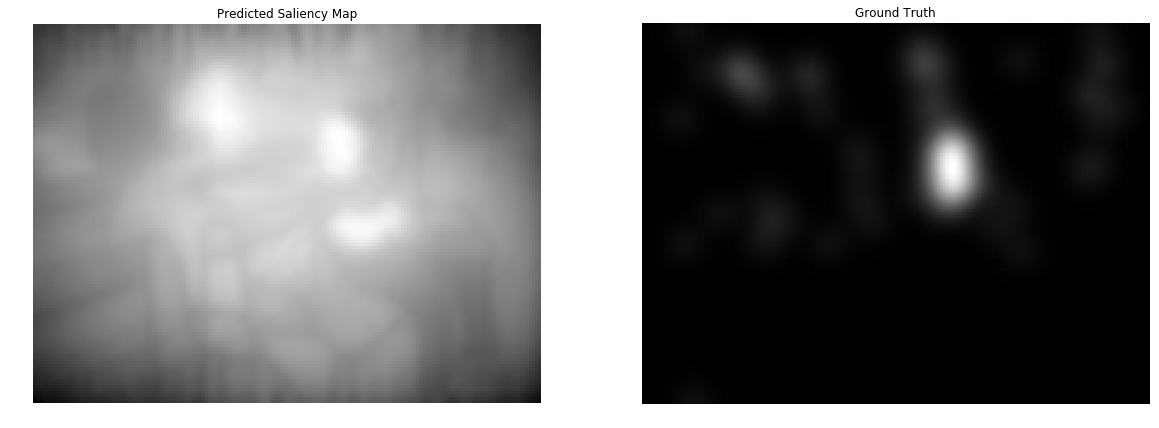

In [23]:
from saliency.model import IttyKoch

model = IttyKoch(top_down="peakiness", mapwidth=128, logtransform=False,
                 surround_sig = [2,10],
                 gabor_wavelength=5.,
                 center_bias=1.5)

final_map, chanmaps = model.predict(img, return_chanmaps=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

ax1.imshow(final_map, cmap="gray")
ax1.axis("off")
ax1.set_title("Predicted Saliency Map")

ax2.imshow(gt, cmap="gray")
ax2.axis("off")
ax2.set_title("Ground Truth")


plt.show()

#### Display the individual channel maps

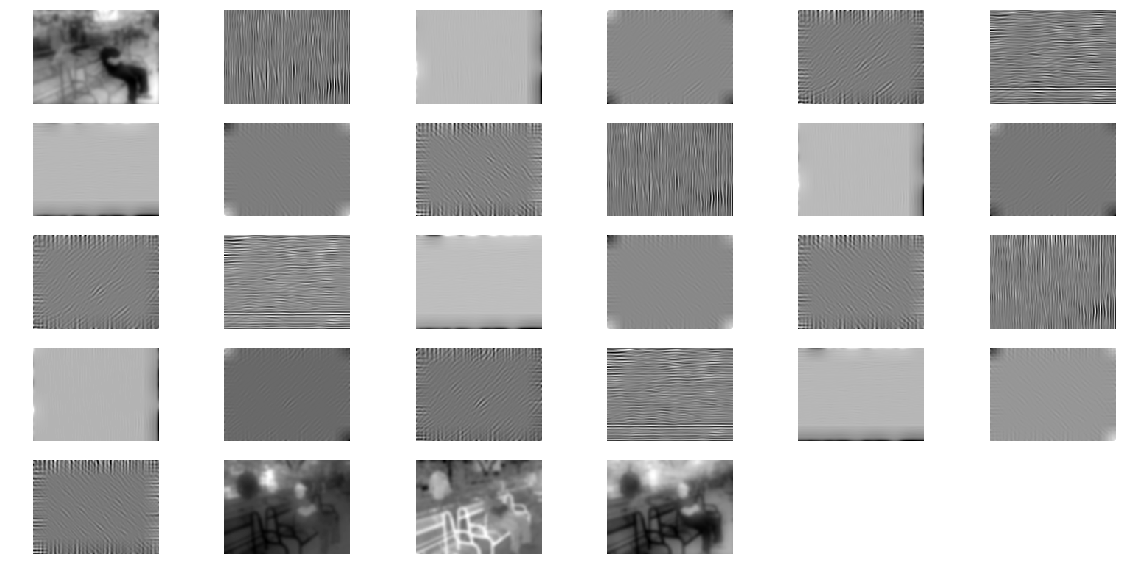

In [24]:
fig, axes = plt.subplots(5,6,figsize=(20,10))
axes = axes.flatten()

for i, ax in enumerate(axes[:chanmaps.shape[-1]]):
    ax.imshow(chanmaps[...,i], cmap="gray")

for ax in axes:
    ax.grid("off")
    ax.axis("off")
    
    
plt.show()